In [1]:
import numpy as np 
from zoedepth.utils.geometry import depth_to_points, create_triangles
from zoedepth.utils.misc import get_image_from_url, colorize
import torch 
from PIL import Image 
import matplotlib.pyplot as plt
import tempfile
from zoedepth.models.builder import build_model
from zoedepth.utils.config import get_config


In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load()
model = torch.hub.load('isl-org/ZoeDepth', "ZoeD_NK", pretrained=True).to(DEVICE).eval()

/home/haitian/anaconda3/envs/zoe/lib/python3.9/site-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/isl-org/ZoeDepth/zipball/main" to /home/haitian/.cache/torch/hub/main.zip


img_size [384, 512]


Using cache found in /home/haitian/.cache/torch/hub/intel-isl_MiDaS_master
/home/haitian/anaconda3/envs/zoe/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt" to /home/haitian/.cache/torch/hub/checkpoints/ZoeD_M12_NK.pt


  0%|          | 0.00/1.35G [00:00<?, ?B/s]

RuntimeError: Error(s) in loading state_dict for ZoeDepthNK:
	Unexpected key(s) in state_dict: "core.core.pretrained.model.blocks.0.attn.relative_position_index", "core.core.pretrained.model.blocks.1.attn.relative_position_index", "core.core.pretrained.model.blocks.2.attn.relative_position_index", "core.core.pretrained.model.blocks.3.attn.relative_position_index", "core.core.pretrained.model.blocks.4.attn.relative_position_index", "core.core.pretrained.model.blocks.5.attn.relative_position_index", "core.core.pretrained.model.blocks.6.attn.relative_position_index", "core.core.pretrained.model.blocks.7.attn.relative_position_index", "core.core.pretrained.model.blocks.8.attn.relative_position_index", "core.core.pretrained.model.blocks.9.attn.relative_position_index", "core.core.pretrained.model.blocks.10.attn.relative_position_index", "core.core.pretrained.model.blocks.11.attn.relative_position_index", "core.core.pretrained.model.blocks.12.attn.relative_position_index", "core.core.pretrained.model.blocks.13.attn.relative_position_index", "core.core.pretrained.model.blocks.14.attn.relative_position_index", "core.core.pretrained.model.blocks.15.attn.relative_position_index", "core.core.pretrained.model.blocks.16.attn.relative_position_index", "core.core.pretrained.model.blocks.17.attn.relative_position_index", "core.core.pretrained.model.blocks.18.attn.relative_position_index", "core.core.pretrained.model.blocks.19.attn.relative_position_index", "core.core.pretrained.model.blocks.20.attn.relative_position_index", "core.core.pretrained.model.blocks.21.attn.relative_position_index", "core.core.pretrained.model.blocks.22.attn.relative_position_index", "core.core.pretrained.model.blocks.23.attn.relative_position_index". 

In [2]:
conf = get_config("zoedepth_nk", "infer")
model= build_model(conf)

img_size [384, 512]


Using cache found in /home/haitian/.cache/torch/hub/intel-isl_MiDaS_master
/home/haitian/anaconda3/envs/zoe/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525539683/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


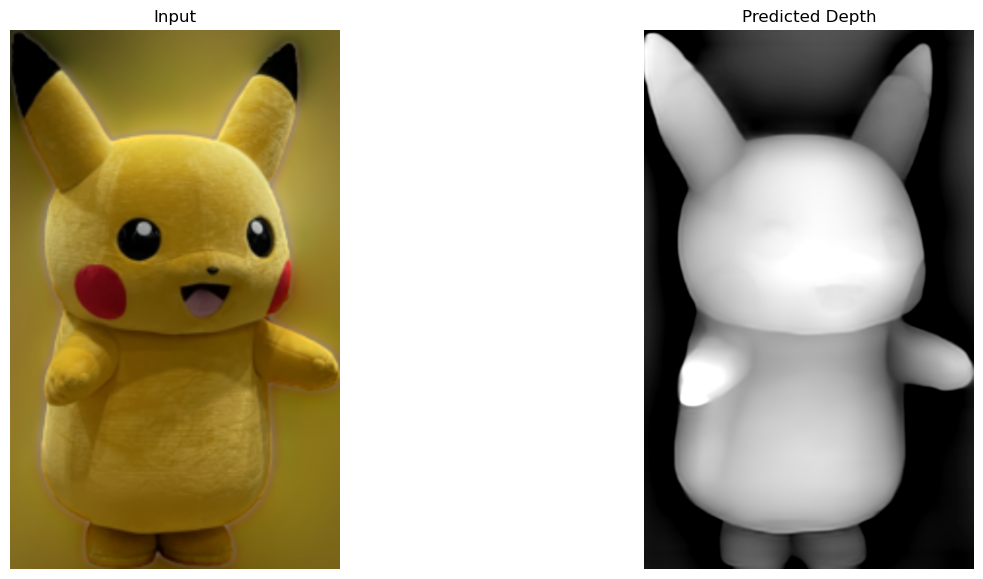

In [3]:
path = 'pikachu'
img = Image.open(path + '.png').convert('RGB')

depth = model.infer_pil(img)
colored_depth = colorize(depth)

### display results
fig, axs = plt.subplots(1,2, figsize=(15,7))
for ax, im, title in zip(axs, [img, colored_depth], ['Input', 'Predicted Depth']):
  ax.imshow(im)
  ax.axis('off')
  ax.set_title(title)


In [ ]:
# save depth image without colorized
depth_img = Image.fromarray((depth * 256).astype(np.uint16))
# depth_img = model.infer_pil(img, output_type='pil')
depth_img.save('depth' + path + '.png')

In [ ]:
# print original depth map
np.set_printoptions(threshold=np.inf)
depth_round = np.around(depth, decimals=2)
print(depth_round)

[[1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.69
  1.69 1.69 1.69 1.68 1.68 1.67 1.67 1.67 1.67 1.67 1.67 1.68 1.68 1.68
  1.69 1.69 1.69 1.69 1.69 1.68 1.68 1.68 1.68 1.68 1.68 1.68 1.68 1.68
  1.67 1.67 1.67 1.67 1.67 1.67 1.67 1.67 1.67 1.67 1.67 1.66 1.66 1.66
  1.66 1.66 1.66 1.65 1.65 1.65 1.65 1.64 1.64 1.64 1.63 1.63 1.63 1.62
  1.62 1.62 1.62 1.61 1.61 1.61 1.61 1.61 1.6  1.6  1.6  1.6  1.6  1.59
  1.59 1.59 1.59 1.59 1.58 1.58 1.58 1.58 1.58 1.58 1.57 1.57 1.57 1.57
  1.57 1.57 1.57 1.56 1.56 1.56 1.56 1.56 1.55 1.55 1.55 1.55 1.55 1.55
  1.54 1.54 1.54 1.54 1.54 1.54 1.53 1.53 1.53 1.53 1.53 1.53 1.53 1.52
  1.52 1.52 1.52 1.52 1.52 1.52 1.51 1.51 1.51 1.51 1.51 1.51 1.51 1.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.5  1.49 1.49 1.49 1.49 1.49 1.49
  1.49 1.49 1.49 1.49 1.48 1.48 1.48 1.48 1.48 1.48 1.48 1.48 1.48 1.48
  1.48 1.48 1.48 1.47 1.47 1.47 1.47 1.47 1.47 1.47 1.47 1.47 1.47 1.47
  1.47 1.47 1.47 1.46 1.46 1.46 1.46 1.46 1.46 1.46 1.46 1.46 1.4

In [ ]:
def predict_depth(model, image):
    depth = model.infer_pil(image)
    return depth

def depth_edges_mask(depth):
    """Returns a mask of edges in the depth map.
    Args:
    depth: 2D numpy array of shape (H, W) with dtype float32.
    Returns:
    mask: 2D numpy array of shape (H, W) with dtype bool.
    """
    # Compute the x and y gradients of the depth map.
    depth_dx, depth_dy = np.gradient(depth)
    # Compute the gradient magnitude.
    depth_grad = np.sqrt(depth_dx ** 2 + depth_dy ** 2)
    # Compute the edge mask.
    mask = depth_grad > 0.05
    return mask

def get_mesh(model, image, keep_edges=False):
    image.thumbnail((1024,1024))  # limit the size of the input image
    depth = predict_depth(model, image)
    pts3d = depth_to_points(depth[None])
    pts3d = pts3d.reshape(-1, 3)

    # Create a trimesh mesh from the points
    # Each pixel is connected to its 4 neighbors
    # colors are the RGB values of the image

    verts = pts3d.reshape(-1, 3)
    image = np.array(image)
    if keep_edges:
        triangles = create_triangles(image.shape[0], image.shape[1])
    else:
        triangles = create_triangles(image.shape[0], image.shape[1], mask=~depth_edges_mask(depth))
    colors = image.reshape(-1, 3)
    mesh = trimesh.Trimesh(vertices=verts, faces=triangles, vertex_colors=colors)

    # Save as glb
    glb_file = tempfile.NamedTemporaryFile(suffix='.glb', delete=False)
    glb_path = glb_file.name
    mesh.export(glb_path)
    return glb_path

glb_path = get_mesh(model, img)


In [44]:
import threejs
from IPython.display import display

def show_mesh(glb_path):
    with open(glb_path, 'rb') as f:
        content = f.read()
        
    # Load GLB model
    buffer = threejs.BufferAttribute(array=content, normalized=False)
    geometry = threejs.BufferGeometry(attributes={'POSITION': buffer})
    material = threejs.MeshStandardMaterial()
    mesh = threejs.Mesh(geometry=geometry, material=material)
    
    # Display using three.js viewer
    viewer = threejs.Viewer([mesh])
    display(viewer)

# Show your mesh
show_mesh(glb_path)

'/tmp/tmp52q_zx8u.glb'